In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
from astroquery.mast import Observations as obv 
import astropy.table as table
import astropy.io.fits as fits 
import astropy.coordinates as coord
import asdf

import os

In [2]:
cwd = os.getcwd()
print(cwd)

/home/rjanish/physics/optical-ir-axion-decay


Explore some of the data of GNZ11.  Can we find the sky spectrum? 

First get all the GNZ11 observation with NIRspec IFU.  

In [41]:
obv_table  = obv.query_criteria(obs_collection="JWST", 
                                instrument_name="NIRSPEC/IFU",
                                target_name="GNZ11")

In [42]:
obv_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str11,str4,str12,str8,str5,str30,str38,float64,float64,str8,str17,int64,float64,float64,float64,float64,float64,str87,float64,str4,str2,int64,str157,str64,str65,str6,bool,float64,str9,str9
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx101_00001_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,1,POLYGON 189.1059016311109 62.24141959718841 189.10499169561078 62.24220101937843 189.1066047212209 62.242620221637694 189.10751485237097 62.24183900368527,--,--,PUBLIC,False,nan,150338330,271555709
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx102_00002_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,2,POLYGON 189.10546853250162 62.2414600308171 189.1045585845582 62.24224145017224 189.1061716063101 62.24266065745679 189.10708174990114 62.24187944233984,--,--,PUBLIC,False,nan,150338331,271555710
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx103_00003_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,3,POLYGON 189.1057012808375 62.241350492754776 189.10479134223084 62.2421319136334 189.10640436135913 62.24255111821733 189.1073144956142 62.24176990157661,--,--,PUBLIC,False,nan,150338332,271555711
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx104_00004_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,4,POLYGON 189.10566870170737 62.241529058189684 189.10475875686814 62.24231047885502 189.1063717850953 62.242729683816975 189.10728192558372 62.24194846738952,--,--,PUBLIC,False,nan,150338333,271555712
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx105_00005_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,5,POLYGON 189.1056731798016 62.24141971073037 189.10476323837807 62.242201131425034 189.10637626081828 62.242620336335015 189.10728639789045 62.24183911987828,--,--,PUBLIC,False,nan,150338334,271555713
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx106_00006_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,6,POLYGON 189.10579270714814 62.241467795221844 189.10488276737098 62.24224921669888 189.10649579404503 62.24266842022201 189.10740592947175 62.241887202982696,--,--,PUBLIC,False,nan,150338335,271555714
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx107_00007_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,7,POLYGON 189.10559716467577 62.241484976607495 189.10468721931295 62.24226639680459 189.10630024418754 62.242685602596595 189.10721038519895 62.24190

In [72]:
extracted = []

for obvs in obv_table:
    pl = obv.get_product_list(obvs)
    mask = ((pl["productSubGroupDescription"] == "X1D") & 
            (pl["calib_level"] == 3))
    if mask.sum() > 0:
        extracted.append(pl[mask])
    print(len(pl[mask]), mask.sum())

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1


In [29]:
obv.get_product_list(obv_table[15])[0]

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str30,str56,str1,str70,str9,str28,str8,str1,str7,str6,str4,str52,int64,str9,str6,int64
139243334,JWST,image,jw04426001001_02101_00005_nrs2,FGS1 guide star acquisition,S,mast:JWST/product/jw04426001001_gs-acq1_2023143042245_stream.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,--,4426,jw04426001001_gs-acq1_2023143042245_stream.fits,408960,139243334,PUBLIC,1


Consider the first of these.  This observation is comprised of many different data files:

In [51]:
extracted[0]

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str38,str64,str1,str70,str9,str28,str9,str1,str7,str6,str4,str52,int64,str9,str6,int64
139257240,JWST,cube,jw04426-o001_t001_nirspec_g235m-f170lp,exposure/target (L2b/L3): 1D extracted spectrum,D,mast:JWST/product/jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits,SCIENCE,Minimum Recommended Products,X1D,--,CALJWST,1.11.4,4426,jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits,279360,139257240,PUBLIC,3


In [73]:
obv.download_products(extracted[0])

Local Path,Status,Message,URL
str106,str8,object,object
./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits,COMPLETE,None,None


In [71]:
extracted = []

for obvs in obv_table:
    ex = obv.download_products(obv.get_product_list(obvs),
                             productSubGroupDescription="X1D")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [68]:
obv.get_product_list(obv_table[-1])

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str38,str64,str1,str70,str9,str28,str9,str1,str7,str6,str4,str52,int64,str9,str6,int64
139257277,JWST,cube,jw04426-o001_t001_nirspec_g140m-f100lp,source/target (L3) : association generator,D,mast:JWST/product/jw04426-o001_20230826t081942_spec3_00001_asn.json,INFO,Minimum Recommended Products,ASN,--,CALJWST,1.11.4,4426,jw04426-o001_20230826t081942_spec3_00001_asn.json,4013,139257277,PUBLIC,3
139257277,JWST,cube,jw04426-o001_t001_nirspec_g140m-f100lp,source/target (L3) : association pool,D,mast:JWST/product/jw04426_20230826t081942_pool.csv,INFO,Minimum Recommended Products,POOL,--,CALJWST,1.11.4,4426,jw04426_20230826t081942_pool.csv,17655,139257277,PUBLIC,3
139257277,JWST,cube,jw04426-o001_t001_nirspec_g140m-f100lp,Preview-Full,D,mast:JWST/product/jw04426-o001_t001_nirspec_g140m-f100lp_s3d.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,4426,jw04426-o001_t001_nirspec_g140m-f100lp_s3d.jpg,970,139257277,PUBLIC,3
139257277,JWST,cube,jw04426-o001_t001_nirspec_g140m-f100lp,exposure/target (L2b/L3): 3D image of spectrum,D,mast:JWST/product/jw04426-o001_t001_nirspec_g140m-f100lp_s3d.fits,SCIENCE,Minimum Recommended Products,S3D,--,CALJWST,1.11.4,4426,jw04426-o001_t001_nirspec_g140m-f100lp_s3d.fits,44821440,139257277,PUBLIC,3
139257277,JWST,cube,jw04426-o001_t001_nirspec_g140m-f100lp,exposure/target (L2b/L3): 1D extracted spectrum,D,mast:JWST/product/jw04426-o001_t001_nirspec_g140m-f100lp_x1d.fits,SCIENCE,Minimum Recommended Products,X1D,--,CALJWST,1.11.4,4426,jw04426-o001_t001_nirspec_g140m-f100lp_x1d.fits,282240,139257277,PUBLIC,3
139243317,JWST,cube,jw04426001001_04101_00001_nrs1,FGS1 guide star acquisition,S,mast:JWST/product/jw04426001001_gs-acq1_2023143042245_cal.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,1.11.4,4426,jw04426001001_gs-acq1_2023143042245_cal.fits,1284480,139257277,PUBLIC,2
139243317,JWST,cube,jw04426001001_04101_00001_nrs1,FGS1 guide star acquisition,S,mast:JWST/product/jw04426001001_gs-acq1_2023143042332_cal.fits,AUXILIARY,--,GS-ACQ1,--,CALJWST,1.11.4,4426,jw04426001001_gs-acq1_2023143042332_cal.fits,1284480,139257277,PUBLIC,2
139243317,JWST,cube,jw04426001001_04101_00001_nrs1,FGS2 guide star acquisition,S,mast:JWST/product/jw04426001001_gs-acq2_2023143042247_cal.fits,AUXILIARY,--,GS-ACQ2,--,CALJWST,1.11.4,4426,jw04426001001_gs-acq2_2023143042247_cal.fits,106560,139257277,PUBLIC,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [69]:
obv.filter_products(obv.get_product_list(obv_table[-1]),
                             calib_level=3)

TypeError: 'int' object is not iterable

What types of datafiles do we have here?

In [6]:
np.unique(obv.get_product_list(obv_table[0])["description"])

FGS guide star fine guide
FGS guide star identification
FGS guide star tracking
FGS1 guide star acquisition
FGS2 guide star acquisition
Preview-Full
exposure (L1b): Uncalibrated 4D exposure data
exposure (L2a): 2D count rate averaged over integrations
exposure (L2a): 3D countrate per integration
exposure (L2b): 2D calibrated exposure average over integrations
exposure (L2c): 2D Calibrated data averaged over integrations


Nothing says sky.... Lets download some, maybe the sky spectrum is contained in these files. 

In [7]:
recommended = obv.filter_products(obv.get_product_list(obv_table[0]), 
                    productGroupDescription="Minimum Recommended Products")

In [9]:
output = obv.download_products(recommended)

INFO: Found cached file ./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_20230524t125457_spec3_00002_asn.json with expected size 4013. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_s3d.fits with expected size 44988480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits with expected size 483840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426_20230524t125457_pool.csv with expected size 17655. [astroquery.query]


In [14]:
output

Local Path,Status,Message,URL
str108,str8,object,object
./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_20230524t125457_spec3_00002_asn.json,COMPLETE,None,None
./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_s3d.fits,COMPLETE,None,None
./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426-o001_t001_nirspec_g235m-f170lp_x1d.fits,COMPLETE,None,None
./mastDownload/JWST/jw04426-o001_t001_nirspec_g235m-f170lp/jw04426_20230524t125457_pool.csv,COMPLETE,None,None


In [15]:
hdu_3d = fits.open(output[1]["Local Path"])
hdu_1d = fits.open(output[2]["Local Path"])

In [37]:
hdu_3d[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   47                                                  
NAXIS2  =                   41                                                  
NAXIS3  =                 1451                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
SRCTYPE = 'EXTENDED'           / Source type used for calibration               
MJD-BEG =    60087.18656565764 / [d] exposure start time in MJD                 
MJD-AVG =    60087.41423036817 / [d] exposure mid-point in MJD                  
MJD-END =    60087.641287673

In [55]:
ifu = hdu_3d[1].data

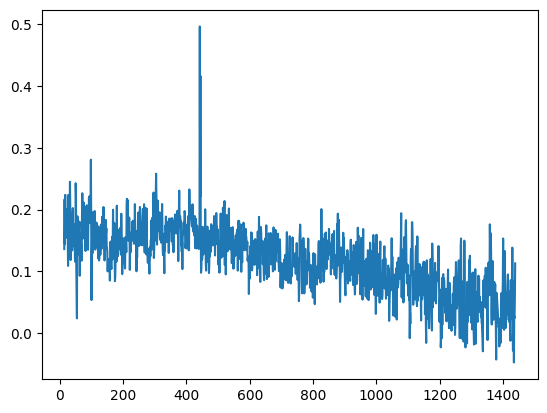

In [56]:
fig, ax = plt.subplots()

nans = np.isnan(ifu[:,10,10])
w = np.arange(ifu.shape[0])

ax.plot(ifu[:,10,10])
ax.plot(w[nans], ifu[nans, 10, 10], color='red')

In [67]:
valid_points = np.isfinite(ifu).sum(axis=0)

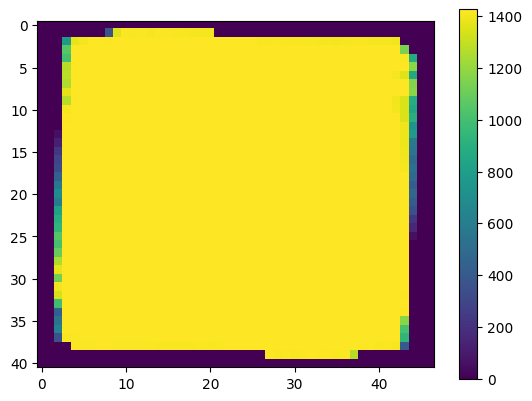

In [78]:
fig, ax = plt.subplots()
out = ax.imshow(valid_points)
fig.colorbar(out)

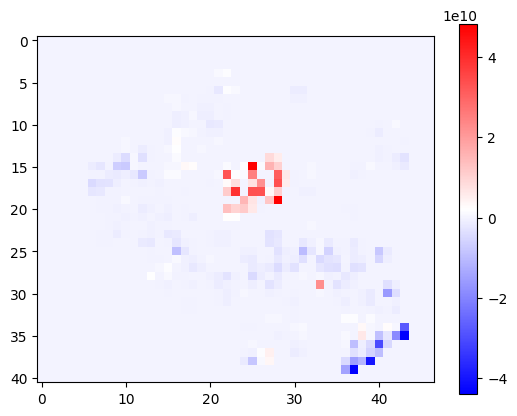

In [95]:
image = np.sum(ifu, axis=0, where=np.isfinite(ifu))
fig, ax = plt.subplots()
out = ax.imshow(image, cmap="bwr")
fig.colorbar(out)

In [94]:
image.min()

-43927536000.0

In [14]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  140 / length of dimension 1                          
NAXIS2  =                 1451 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   18 / number of table fields                         
EXTNAME = 'EXTRACT1D'          / extension name                                 
EXTVER  =                    1 / extension value                                
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'um      '        

In [15]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               239759 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'ASDF_METADATA'                                                       
TFORM1  = '239759B '                                                            
EXTNAME = 'ASDF    '           / extension name                                 

In [16]:
hdul[1].data

FITS_rec([(1.64543554, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.),
          (1.64649554, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.),
          (1.64755554, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.),
          ...,
          (3.1803156 , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.),
          (3.1813756 , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.),
          (3.1824356 , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,           1, 0., 0., 0., 0., 0., 1927.)],
         dtype=(numpy.record, [('WAVELENGTH', '>f8'), ('FLUX', '>f8'), ('FLUX_ERROR', '>f8'), ('FLUX_VAR_POISSON', '>f8'), ('FLUX_VAR_RNOISE', '>f8'), ('FLUX_VAR_FLAT', '>f8'), ('SURF_BRIGHT', '>f8'), ('SB_ERROR', '>f8'), ('SB_VAR_POISSON', '>f8'), ('SB_VAR_RNOISE', '>f8'), ('SB_VAR_FLAT', '>f8'), ('DQ', '>i4'), ('BACKGROUND', '>f8'), ('BKGD_ERROR', '>f8'), 

In [17]:
w = hdul[1].data["WAVELENGTH"]
s = hdul[1].data["SURF_BRIGHT"]
b = hdul[1].data["BACKGROUND"]

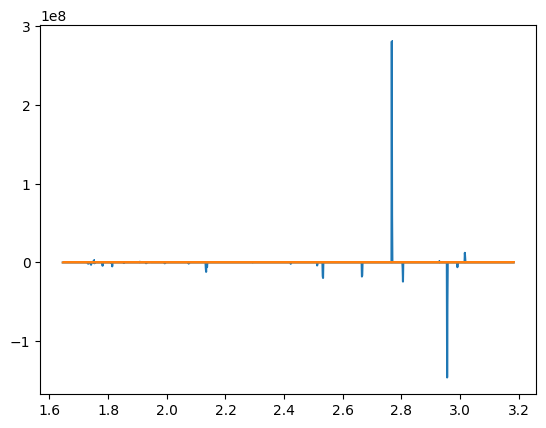

In [18]:
fig,ax = plt.subplots()
ax.plot(w, s, marker=',')
ax.plot(w, b, marker=',')

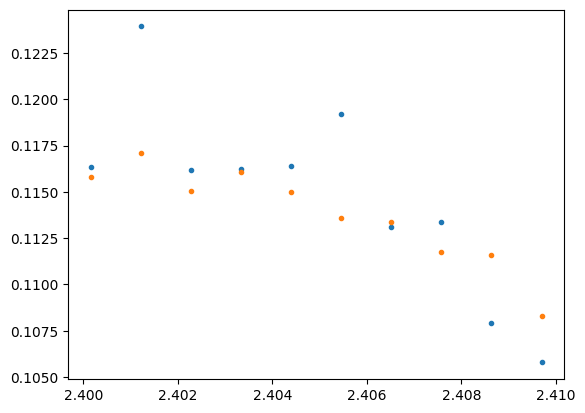

In [19]:
zoom = (2.400 < w) & (w < 2.410)

fig,ax = plt.subplots()
ax.plot(w[zoom], s[zoom], marker='.', linestyle='')
ax.plot(w[zoom], b[zoom], marker='.', linestyle='')

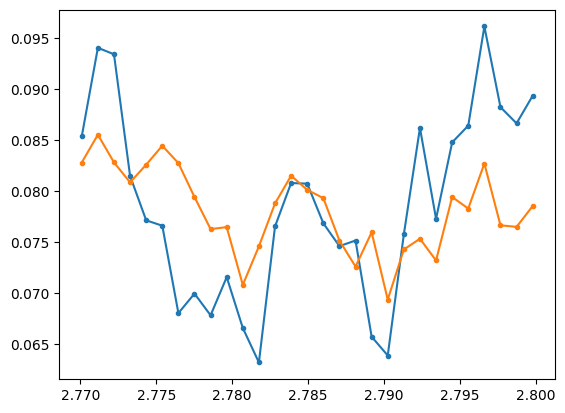

In [20]:
zoom = (2.77 < w) & (w < 2.8)

fig,ax = plt.subplots()
ax.plot(w[zoom], s[zoom], marker='.', linestyle='-')
ax.plot(w[zoom], b[zoom], marker='.', linestyle='-')

Test units: compute fov of this observation 

In [21]:
l = np.sqrt(hdul[1].data["FLUX"]/(1e6*s))

/tmp/ipykernel_15718/2416818199.py:1: RuntimeWarning: invalid value encountered in divide
  l = np.sqrt(hdul[1].data["FLUX"]/(1e6*s))


In [22]:
np.unique(l)*(180/np.pi)*(3600)

array([3.57068156, 3.88197429, 3.90892831, 3.91404137, 3.91531859,
       3.91659539, 3.91787178, 3.92042331, 3.92169845, 3.92297318,
       3.92424749, 3.92552139, 3.92679488, 3.92679488, 3.92806795,
       3.92934061, 3.92934061, 3.93061286, 3.9318847 , 3.9318847 ,
       3.93315612, 3.93315612, 3.93442714, 3.93442714, 3.93569774,
       3.93569774, 3.93696794, 3.93696794, 3.93823772, 3.93823772,
       3.9395071 , 3.9395071 , 3.94077606, 3.94077606, 3.94077606,
       3.94204462, 3.94204462, 3.94331277, 3.94331277, 3.94331277,
       3.94458052, 3.94458052, 3.94584785, 3.94584785, 3.94584785,
       3.94711478, 3.94711478, 3.94711478, 3.9483813 , 3.9483813 ,
       3.9483813 , 3.94964742, 3.94964742, 3.94964742, 3.95091313,
       3.95091313, 3.95217843, 3.95217843, 3.95217843, 3.95344333,
       3.95344333, 3.95344333, 3.95470783, 3.95470783, 3.95597192,
       3.95597192, 3.9572356 , 3.9572356 , 3.95849889, 3.95849889,
       3.95976177, 3.96102424, 3.96102424,        nan])

In [23]:
np.sqrt(np.unique(hdul[1].data["FLUX"]/(2.3e-5*s)))

/tmp/ipykernel_15718/2248884263.py:1: RuntimeWarning: invalid value encountered in divide
  np.sqrt(np.unique(hdul[1].data["FLUX"]/(2.3e-5*s)))


array([3.60962487, 3.92431268, 3.95156068, 3.95672949, 3.95672949,
       3.95802064, 3.95931137, 3.96060168, 3.96060168, 3.96318104,
       3.96447009, 3.96575872, 3.96704693, 3.96704693, 3.96704693,
       3.96833472, 3.96833472, 3.9696221 , 3.9696221 , 3.9696221 ,
       3.97090906, 3.97090906, 3.97090906, 3.97090906, 3.9721956 ,
       3.9721956 , 3.9721956 , 3.97348172, 3.97348172, 3.97348172,
       3.97476743, 3.97476743, 3.97476743, 3.97476743, 3.97605272,
       3.97605272, 3.97605272, 3.97605272, 3.97605272, 3.9773376 ,
       3.9773376 , 3.9773376 , 3.97862206, 3.97862206, 3.97862206,
       3.97862206, 3.97990611, 3.97990611, 3.97990611, 3.97990611,
       3.98118974, 3.98118974, 3.98118974, 3.98118974, 3.98118974,
       3.98247296, 3.98247296, 3.98247296, 3.98247296, 3.98247296,
       3.98375577, 3.98375577, 3.98375577, 3.98375577, 3.98503816,
       3.98503816, 3.98503816, 3.98503816, 3.98503816, 3.98503816,
       3.98632015, 3.98632015, 3.98632015, 3.98632015, 3.98632

DM constraint

the bin width in wavelength [microns] is 

In [24]:
dlambdas = np.unique(w[1:] - w[:-1])
print(dlambdas)
print(dlambdas[0]- dlambdas[1])
dlambda = dlambdas[0]

frac_dlambda = dlambda/w
print(frac_dlambda.min(), frac_dlambda.max())

[0.00106 0.00106]
-2.220446049250313e-16
0.0003330782372460377 0.0006442063590769667


In [2]:
print(150.0/(3e5))
print(220.0/(3e5))
print(1/2700.0)

0.0005
0.0007333333333333333
0.00037037037037037035


we need some more careful way to account for the DM velocity distribution.  For now, take it simply to be ~1e-3 and matching the width of the observation bins. This will be close to correct, and seems like it may be conservative as the observation widths are < 1e-3.  

In [25]:
def meV_from_wavelength(lambda_micron):
    return 2.464/lambda_micron

In [26]:
def reach_gGeV(Iobv, meV):
    """ Iobv in MJy.sr """
    return (1.467e-10)*np.sqrt(Iobv)/meV

In [27]:
existing_limits_filenames = {"MUSE":"existing-limits/Telescopes_MUSE.txt",
                             "Globular Clusters":"existing-limits/GlobularClusters.txt"}
existing_limts = {}
for limit_name in existing_limits_filenames:
    existing_limts[limit_name] = np.loadtxt(existing_limits_filenames[limit_name])

In [28]:
existing_limits_filenames.keys()

dict_keys(['MUSE', 'Globular Clusters'])

/tmp/ipykernel_15718/1205449096.py:3: RuntimeWarning: invalid value encountered in sqrt
  return (1.467e-10)*np.sqrt(Iobv)/meV


(1e-14, 1e-09)

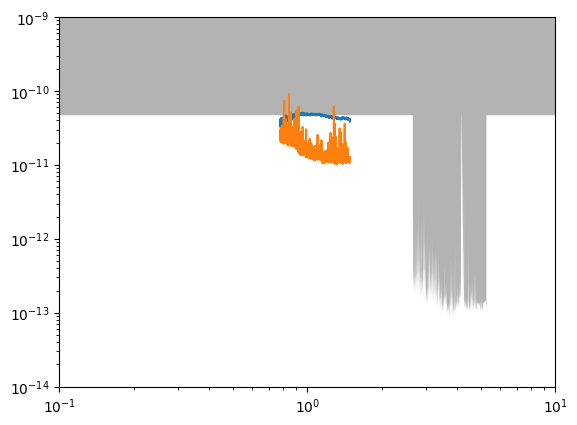

In [99]:
m = meV_from_wavelength(w)
g = reach_gGeV(b, m)

db = hdul[1].data["BKGD_ERROR"]
g_db = reach_gGeV(10*db, m)

g_s = reach_gGeV(s, m)

fig, ax = plt.subplots()
remove_edges = g > 0
ax.plot(m[remove_edges], g[remove_edges], alpha=1)
ax.plot(m[remove_edges], g_db[remove_edges], alpha=1)
# ax.plot(m[remove_edges], g_s[remove_edges], alpha=0.3)

upper_edge = 1e-9
for limit_name in existing_limts:
    ax.fill_between(existing_limts[limit_name][:,0], 2*upper_edge, 
                    existing_limts[limit_name][:,1], 
                    label=limit_name,
                    color="0.7", alpha=1, edgecolor=None)

ax.set_xscale("log")
ax.set_xlim(0.1, 10)
ax.set_yscale("log")
ax.set_ylim(1e-14, upper_edge)

<ErrorbarContainer object of 3 artists>

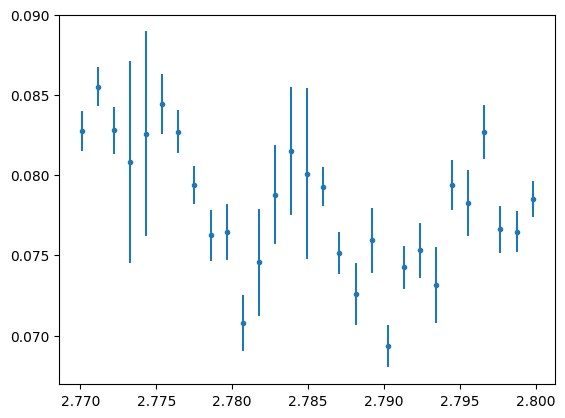

In [31]:
fig,ax = plt.subplots()

ax.errorbar(w[zoom], b[zoom], db[zoom], marker='.', linestyle='')

In [32]:
lines = (b[remove_edges][1:-1] - 0.5*(b[remove_edges][2:] + b[remove_edges][:-2]))/db[remove_edges][1:-1]

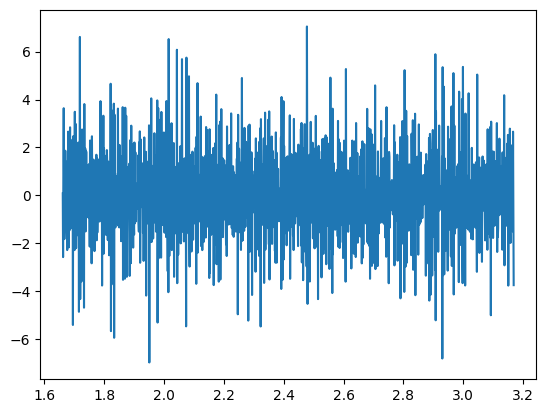

In [33]:
fig, ax = plt.subplots()

ax.plot(w[remove_edges][1:-1], lines)

<ErrorbarContainer object of 3 artists>

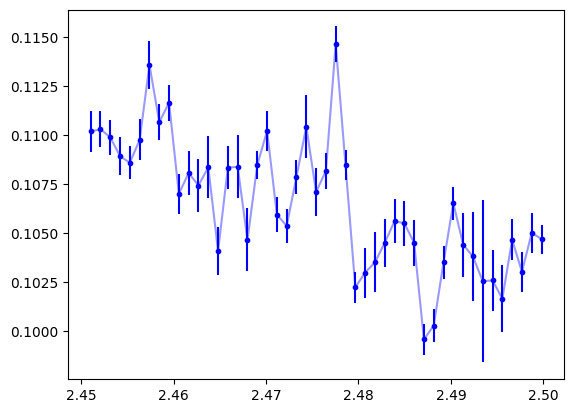

In [34]:
fig, ax = plt.subplots()
z2 = (2.45 < w[remove_edges]) & (w[remove_edges] < 2.5)
ax.plot(w[remove_edges][z2], 
            b[remove_edges][z2], 
           marker='.', linestyle='-', alpha=0.4, color='b')
ax.errorbar(w[remove_edges][z2], 
            b[remove_edges][z2], 
            db[remove_edges][z2],
           marker='.', linestyle='', color='b')

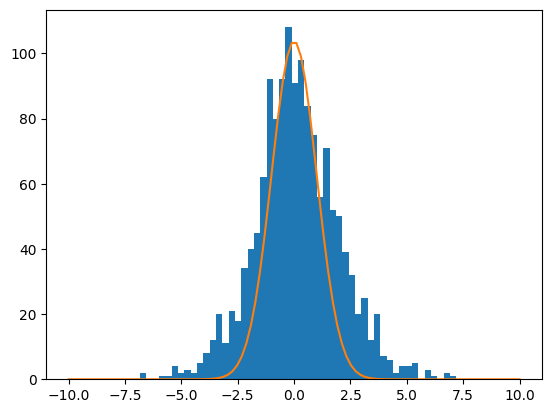

In [35]:
fig, ax = plt.subplots()

hist_dat = ax.hist(lines, bins=50, align="right")
NN = np.sum(hist_dat[0])
peaks_pdf = sp.stats.norm.pdf
heights = np.linspace(-10,10,100)
ax.plot(heights, peaks_pdf(heights)*260)

In [36]:
se = hdul[1].data["SB_ERROR"]
s_lines = (s[remove_edges][1:-1] - 0.5*(s[remove_edges][2:] + s[remove_edges][:-2]))/se[remove_edges][1:-1]

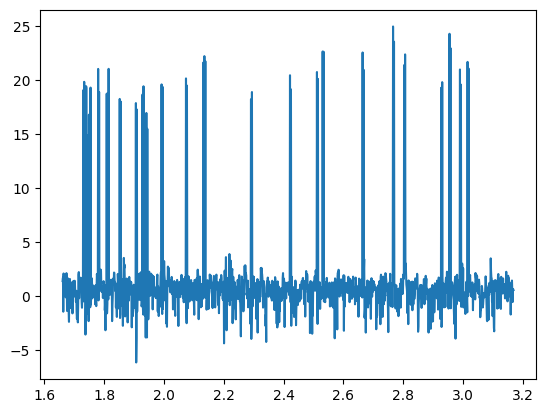

In [37]:
fig, ax = plt.subplots()

ax.plot(w[remove_edges][1:-1], np.log(np.abs(s_lines)))

(-10.0, 10.0)

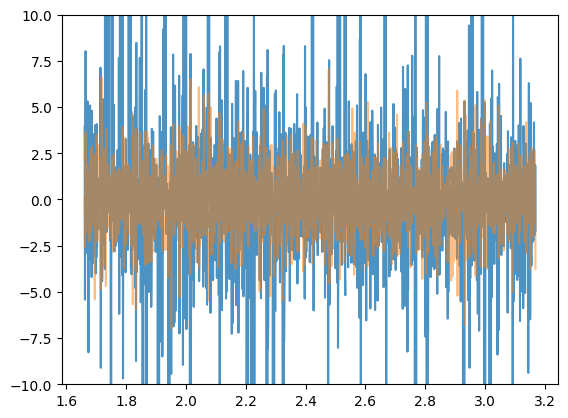

In [38]:
fig, ax = plt.subplots()

ax.plot(w[remove_edges][1:-1], s_lines, alpha=0.8)
ax.plot(w[remove_edges][1:-1], lines, alpha=0.5)
ax.set_ylim([-10, 10])

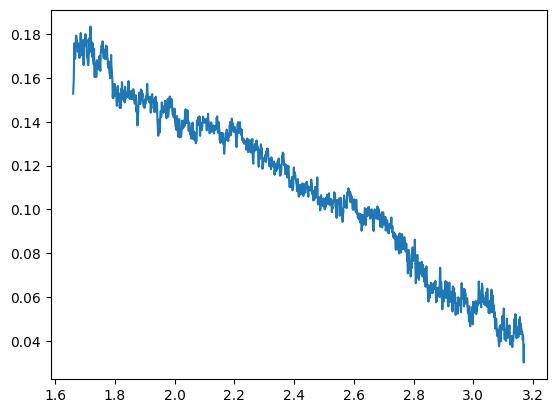

In [39]:
fig, ax = plt.subplots()
ax.plot(w[remove_edges], b[remove_edges])

<ErrorbarContainer object of 3 artists>

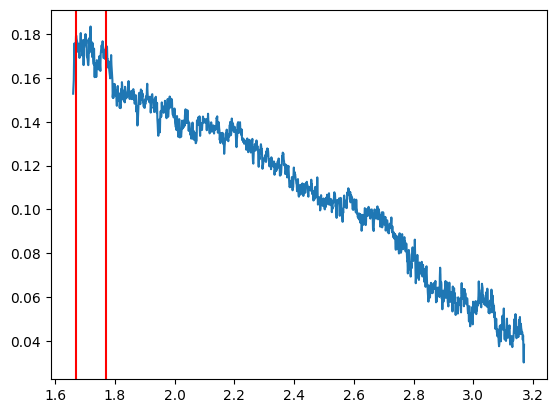

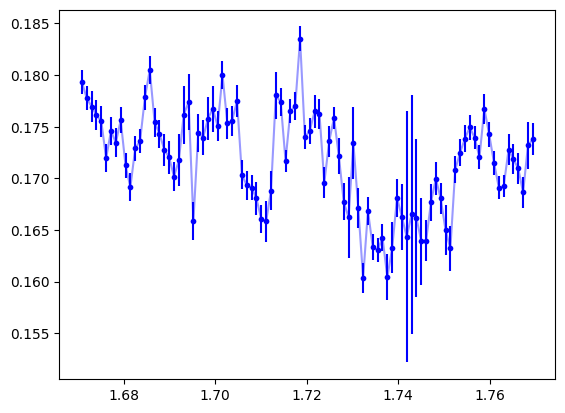

In [40]:
left, right = 1.67, 1.77
z2 = (left < w[remove_edges]) & (w[remove_edges] < right)

fig, ax = plt.subplots()
ax.plot(w[remove_edges], b[remove_edges])
ax.axvline(left, color='r')
ax.axvline(right, color='r')

fig, ax = plt.subplots()
ax.plot(w[remove_edges][z2], 
        b[remove_edges][z2], 
        marker='.', linestyle='-', alpha=0.4, color='b')
ax.errorbar(w[remove_edges][z2], 
            b[remove_edges][z2], 
            db[remove_edges][z2],
            marker='.', linestyle='', color='b')

In [83]:
n = 10
wn = w[remove_edges][n:-n]
bn = np.zeros(wn.shape)
for i in range(bn.size):
    left = np.median(b[remove_edges][i:i + n])
    right = np.median(b[remove_edges][i + n + 1:i + 2*n + 1])
    mid = (right + left)/2.0
    excess = b[remove_edges][n + i] - mid
    bn[i] = excess/db[remove_edges][n+1]

(array([  3.,   0.,   3.,   6.,   8.,   8.,  19.,  26.,  30.,  56.,  80.,
         89., 122., 130., 151., 141., 120., 116.,  82.,  75.,  44.,  50.,
         18.,  12.,   5.,   2.,   4.,   1.,   1.,   3.]),
 array([-9.69505294, -9.03890351, -8.38275408, -7.72660465, -7.07045522,
        -6.41430579, -5.75815636, -5.10200694, -4.44585751, -3.78970808,
        -3.13355865, -2.47740922, -1.82125979, -1.16511036, -0.50896093,
         0.1471885 ,  0.80333793,  1.45948736,  2.11563679,  2.77178622,
         3.42793565,  4.08408508,  4.74023451,  5.39638394,  6.05253337,
         6.7086828 ,  7.36483223,  8.02098166,  8.67713109,  9.33328052,
         9.98942995]),
 <BarContainer object of 30 artists>)

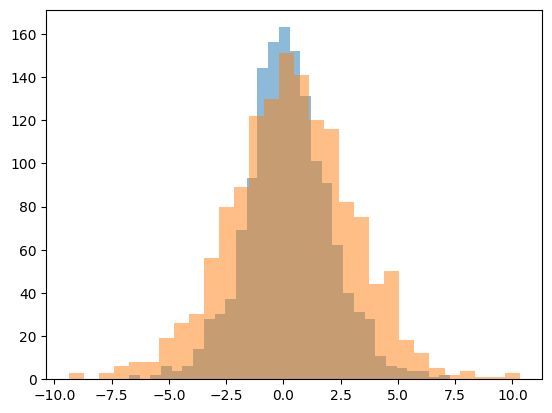

In [84]:
fig, ax = plt.subplots()
ax.hist(lines, bins=30, align="right", alpha=0.5)
ax.hist(bn, bins=30, align="right", alpha=0.5)

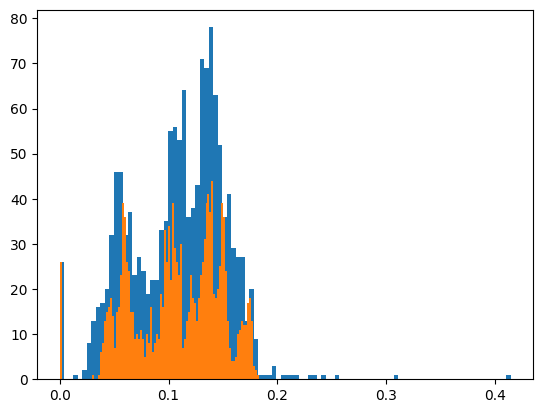

In [94]:
fig, ax = plt.subplots()
chop = s[np.absolute(s) < 100]
hd = ax.hist(chop, bins=100)
hd = ax.hist(b, bins=100)

In [41]:
filenames = []
ot = obv.get_product_list(obv_table[1])
for frame in ot:
    if "1D extracted spectrum" in frame["description"]:
        uri = frame["dataURI"] 
        filename = uri[18:]
        filenames.append(filename)
        if filename not in os.listdir():
            print("downloading {}".format(filename))
            obv.download_file(frame["dataURI"])
        


In [42]:
skies = []
wavelengths = []
for filename in filenames:
    hdu = fits.open(filename)
    skies.append(hdu[1].data["BACKGROUND"])
    wavelengths.append(hdu[1].data["WAVELENGTH"])

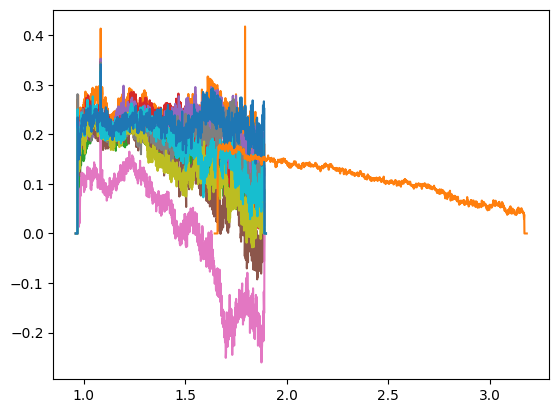

In [43]:
fig, ax = plt.subplots()

for w_i, b_i in zip(wavelengths, skies):
    ax.plot(w_i, b_i)
ax.plot(w, b)

In [18]:
hdul = fits.open("data/mastDownload/JWST/jw04426-o001_t001_nirspec_g140m-f100lp/jw04426-o001_t001_nirspec_g140m-f100lp_x1d.fits")

In [19]:
import astropy.units as u

In [20]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-08-26T10:05:54.564' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw04426-o001_t001_nirspec_g140m-f100lp_x1d.fits' / Name of the file  
SDP_VER = '2023_2a '           / Data processing (DP) Software Version          
PRD_VER = 'PRDOPSSOC-062'      / S&OC Project Reference Database (PRD) Version  
OSS_VER = '8.6     '           / Observatory Scheduling Software (OSS) Version  
GSC_VER = 'GSC2431 '        

In [21]:
c=coord.SkyCoord(ra=hdul[0].header["TARG_RA"]*u.degree, 
               dec=hdul[0].header["TARG_DEC"]*u.degree)

In [22]:
l = c.galactic.l.degree
b = c.galactic.b.degree

print(c)
print(c.galactic)
print(l, b)

<SkyCoord (ICRS): (ra, dec) in deg
    (189.10604208, 62.24204167)>
<SkyCoord (Galactic): (l, b) in deg
    (125.96364875, 54.79774432)>
125.96364875475768 54.79774431840697


In [23]:
c.galcen_distance

In [87]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  140 / length of dimension 1                          
NAXIS2  =                 1447 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   18 / number of table fields                         
EXTNAME = 'EXTRACT1D'          / extension name                                 
EXTVER  =                    1 / extension value                                
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'um      '        

In [4]:
os.path.join("/one/two", ["three/four", "five/six"])

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

In [6]:
[os.path.join("/one/two", f) for f in ["three/four", "five/six"]]

['/one/two/three/four', '/one/two/five/six']

In [2]:
import astropy.table as table

In [3]:
t = table.Table(names=('a', 'b'))

In [4]:
t.add_row((1, 3))

In [5]:
t.add_row((8, 9))

In [6]:
t

a,b
float64,float64
1.0,3.0
8.0,9.0


In [7]:
len(t)

2

In [13]:
t1 = table.Table(names=('a', 'b'))
t1.add_row((12, 12))

In [14]:
t1

a,b
float64,float64
12.0,12.0


In [11]:
t2 = table.vstack((t, t1))

In [15]:
t2

a,b
float64,float64
1.0,3.0
8.0,9.0
12.0,12.0
0.0,1.0


In [17]:
t2.add_row(t1[0])

In [20]:
t

a,b
float64,float64
1.0,3.0
8.0,9.0


In [23]:
t2

a,b
float64,float64
1.0,3.0
8.0,9.0
12.0,12.0
0.0,1.0
12.0,12.0
1.0,3.0
8.0,9.0


In [24]:
t2 = table.vstack((t2, t))

In [26]:
t2

a,b
float64,float64
1.0,3.0
8.0,9.0
12.0,12.0
0.0,1.0
12.0,12.0
1.0,3.0
8.0,9.0
1.0,3.0
8.0,9.0


In [27]:
t3 = table.Table()

In [28]:
t3.add_row(t2[0])

ValueError: Mismatch between number of vals and columns

In [37]:
t.dtype

dtype([('a', '<f8'), ('b', '<f8')])

In [37]:
t4 = table.Table(dtype=[('a', str), ('b', float)])
t4

a,b
str1,float64


In [39]:
t4.add_row(t[0])
t4

a,b
float64,float64
1.0,3.0


In [2]:
hdu = fits.open("data/resolution/jwst_nirspec_g140h_disp.fits")

In [23]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2016-08-30T10:36:01' / UTC-GMT creation time                         
REFTYPE = 'DISPERSION'         / reference file type                            
TELESCOP= 'JWST    '           / telescope                                      
LITREF  = '/Users/pferruit/Documents/workspace/JWST_Python/data/as-built-Misce&'
CONTINUE  'llaneous/spectralResolution_G140H.src&'                              
CONTINUE  '' / litterature reference for the data                               
AUTHOR  = './p_generateReferenceFilesETC_201608_v1.py - version 1' / author     
FILETYPE= 'DATA TABLE'         / overall file type                              
DESCRIP = 'GWA element dispe

In [8]:
hdu[1].data["DLDS"]

array([0.00024101, 0.00024102, 0.00024103, ..., 0.00022573, 0.00022569,
       0.00022564], dtype=float32)

In [24]:
res = hdu[1].data["WAVELENGTH"]/hdu[1].data["R"]

In [22]:
os.listdir("data/resolution/")

['jwst_nirspec_g235h_disp.fits',
 'jwst_nirspec_g140m_disp.fits',
 'jwst_nirspec_g140h_disp.fits',
 'jwst_nirspec_g235m_disp.fits',
 'jwst_nirspec_g395h_disp.fits',
 'jwst_nirspec_prism_disp.fits',
 'jwst_nirspec_g395m_disp.fits']

In [27]:
print(np.min(res))
print(np.mean(res))
print(np.median(res))
print(np.max(res))

0.0004964147
0.0005204105
0.0005233223
0.000530865


In [29]:
" stuff  ".strip()

'stuff'

In [33]:
np.column_stack((np.arange(5), np.arange(5)**2))

array([[ 0,  0],
       [ 1,  1],
       [ 2,  4],
       [ 3,  9],
       [ 4, 16]])

In [39]:
np.arange(1,10+0.55,0.55)

array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
        5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35])

In [42]:
5%30

5

In [43]:
for i, a in enumerate(['a', 'b']):
    print(i)
    print(a)
    print()

0
a

1
b

